In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#### I have returned to the Jupyter Notebook to do some more familiar calulations. I might return to the Streamlit at the end of the process. 

In [9]:
# Open our clean.csv from the previous session.
df = pd.read_csv("/Users/claytonlouden/reto-data/data/clean.csv")

In [10]:
# Dropping the extra index column "Unnamed: 0"
df = df.drop(['Unnamed: 0'], axis=1)
df

distance  consume  speed  temp_inside  temp_outside  AC  E10  SP98
0        28.0      5.0     26         21.5            12   0    1     0
1        12.0      4.2     30         21.5            13   0    1     0
2        11.2      5.5     38         21.5            15   0    1     0
3        12.9      3.9     36         21.5            14   0    1     0
4        18.5      4.5     46         21.5            15   0    1     0
..        ...      ...    ...          ...           ...  ..  ...   ...
383      16.0      3.7     39         24.5            18   0    0     1
384      16.1      4.3     38         25.0            31   1    0     1
385      16.0      3.8     45         25.0            19   0    0     1
386      15.4      4.6     42         25.0            31   1    0     1
387      14.7      5.0     25         25.0            30   1    0     1

[388 rows x 8 columns]

In [11]:
# Check the percentage of null values
df.isnull().sum()/df.shape[0]

distance        0.000000
consume         0.000000
speed           0.000000
temp_inside     0.030928
temp_outside    0.000000
AC              0.000000
E10             0.000000
SP98            0.000000
dtype: float64

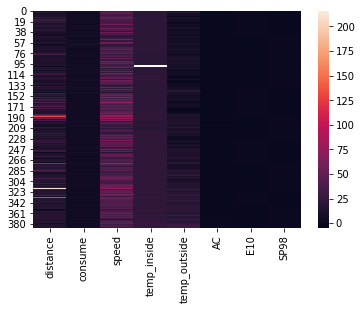

In [12]:
# Make a heatmap to see correlations
sns.heatmap(df);

Unfortunately, this is too similar to what I see is called a clustermap. Which is not my intention maybe we will try a different visualization library.

In [14]:
# UNSURE why I am not getting my the results I want
px.imshow(df)

Ah....silly rabbit! The benefit of talking to yourself out loud is an underrated habit to help you realize what you are looking for. My mistake was not considering my purpose for the heatmap. I am looking for any strong correlation. How do I get correlation? with `corr()` that was easy. And there doesn't seem to be any strong correlations.

<AxesSubplot:>

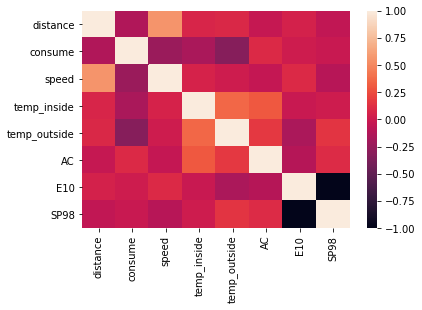

In [15]:
sns.heatmap(df.corr())

Directions I would like to take from here: there is an immediate question about the relationship of AC and speed and distance with comsumption. The question is if consumption under these circumstances can predict what type of fuel was used.  

In [16]:
# Just taking a look at some aggregate calculations
df.agg(['mean', 'min', 'max', 'sum'])

distance      consume         speed  temp_inside  temp_outside  \
mean    19.652835     4.912371     41.927835    21.929521     11.358247   
min      1.300000     3.300000     14.000000    19.000000     -5.000000   
max    216.100000    12.200000     90.000000    25.500000     31.000000   
sum   7625.300000  1906.000000  16268.000000  8245.500000   4407.000000   

            AC         E10        SP98  
mean   0.07732    0.412371    0.587629  
min    0.00000    0.000000    0.000000  
max    1.00000    1.000000    1.000000  
sum   30.00000  160.000000  228.000000

In [17]:
# separate e10 sp98 into different dataframes to do some side by side comparisons 
df_E = df[df['E10']==1]
df_E

distance  consume  speed  temp_inside  temp_outside  AC  E10  SP98
0        28.0      5.0     26         21.5            12   0    1     0
1        12.0      4.2     30         21.5            13   0    1     0
2        11.2      5.5     38         21.5            15   0    1     0
3        12.9      3.9     36         21.5            14   0    1     0
4        18.5      4.5     46         21.5            15   0    1     0
..        ...      ...    ...          ...           ...  ..  ...   ...
344      16.1      5.1     30         25.0            16   1    1     0
345      16.0      4.0     42         22.0            15   0    1     0
346      15.4      4.8     40         22.0            18   0    1     0
347      17.2      3.9     35         22.0            16   0    1     0
348      16.6      4.6     50         22.0            25   0    1     0

[160 rows x 8 columns]

In [18]:
df_SP = df[df['SP98']==1]
df_SP

distance  consume  speed  temp_inside  temp_outside  AC  E10  SP98
44        5.4      3.3     32         21.5             7   0    0     1
45        2.0      9.9     21         21.5             4   0    0     1
46       14.2      5.1     32         21.5             7   0    0     1
47       16.0      4.9     25         21.5             8   0    0     1
48       11.8      4.9     25         21.5            11   0    0     1
..        ...      ...    ...          ...           ...  ..  ...   ...
383      16.0      3.7     39         24.5            18   0    0     1
384      16.1      4.3     38         25.0            31   1    0     1
385      16.0      3.8     45         25.0            19   0    0     1
386      15.4      4.6     42         25.0            31   1    0     1
387      14.7      5.0     25         25.0            30   1    0     1

[228 rows x 8 columns]

In [19]:
# Lets get the mileage of SP98 and E10
df_mileage_SP = df_SP['distance']/ df_SP['consume']
sp_mileage_tot = df_mileage_SP.agg(['mean'])
sp_mileage_tot

mean    4.008745
dtype: float64

In [20]:
df_mileage_E = df_E['distance']/df_E['consume']
e_mileage_tot = df_mileage_E.agg(['mean'])
e_mileage_tot 

mean    4.471731
dtype: float64

In [21]:
print('-'*30)
print('Kilometers per liter E10:')
print(e_mileage_tot[0])
print('-'*30)
print('Kilometers per liter SP98:')
print(sp_mileage_tot[0])
print('-'*30)

------------------------------
Kilometers per liter E10:
4.471730619659065
------------------------------
Kilometers per liter SP98:
4.008745071879544
------------------------------


We can immediately see that E10 is more efficient fuel.
<br> We found a reference to price:
<br>`E10 is sold for 1,38€; SP98 is sold for 1,46€; per liter.`
<br> If we use this as an orientative measure we could tell you how much you could have saved using E10 
- first we need adjust the consumption of SP98 dataset for the consumption rate of E10. 
- Then we get the amount spent on E10 consumption for that distance travelled.

In [22]:
# We are going to work directly on the SP dataframe 
# in order to show the hypothetical difference if E10 fuels was used instead.  
sp_dist_tot = df_SP.distance.sum()
sp_liters_tot = df_SP.consume.sum()
sp_cost_tot = sp_liters_tot * 1.46

# We will take the total distance travelled with SP98 fuel
# and divide it my the mileage of E10 fuel 
# to get the total liters required by E10 to travel the same distance
liters_with_e = sp_dist_tot/e_mileage_tot[0]
e_cost_tot = liters_with_e * 1.38

print(f"Distance travelled with SP98:                 {sp_dist_tot} km")
print('-'*50)
print(f"Total fuel consuption with SP98:              {sp_liters_tot} ltr")
print(f"Total cost of using SP98:                     {sp_cost_tot}€")
print('-'*50)
print('-'*50)
print(f"Total fuel consumption if E10 were used:      {liters_with_e:.2f} ltr")
print(f"Total cost if E10 were used:                  {e_cost_tot:.2f}")
print(f"Total we could have saved:                    {sp_cost_tot-e_cost_tot:.2f}€")
print('-'*50)
print(f"That is {((sp_liters_tot-liters_with_e)/sp_liters_tot)*100:.2f}% less fuel consumed.")
print(f"And a {((sp_cost_tot-e_cost_tot)/sp_cost_tot)*100:.2f}% savings by using E10 fuel.")

Distance travelled with SP98:                 4249.9 km
--------------------------------------------------
Total fuel consuption with SP98:              1117.0 ltr
Total cost of using SP98:                     1630.82€
--------------------------------------------------
--------------------------------------------------
Total fuel consumption if E10 were used:      950.39 ltr
Total cost if E10 were used:                  1311.54
Total we could have saved:                    319.28€
--------------------------------------------------
That is 14.92% less fuel consumed.
And a 19.58% savings by using E10 fuel.


In [23]:
# Now we will turn this data into a DataFrame so that wwe can visualize it
df_hypothetical= pd.DataFrame({"Fuel": ["SP98", "E10"], 
                              "Consume(L)": [float("{:.2f}".format(sp_liters_tot)),float("{:.2f}".format(liters_with_e))],
                              "Cost(€)": [float("{:.2f}".format(sp_cost_tot)), float("{:.2f}".format(e_cost_tot))],
                              "Mileage(km/L)": [sp_mileage_tot[0],e_mileage_tot[0]]})



In [24]:
df_hypothetical

Fuel  Consume(L)  Cost(€)  Mileage(km/L)
0  SP98     1117.00  1630.82       4.008745
1   E10      950.39  1311.54       4.471731

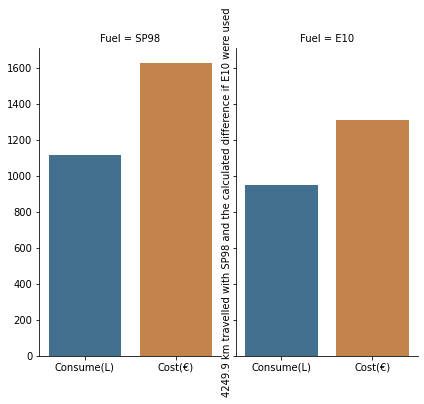

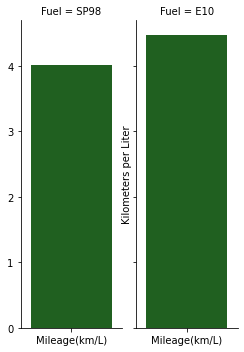

In [25]:

comparison = sns.catplot(col = "Fuel",data=df_hypothetical[["Fuel","Consume(L)","Cost(€)"]], saturation=.5,
                kind="bar", ci=None, aspect=.6);
plt.ylabel("4249.9 km travelled with SP98 and the calculated difference if E10 were used");
mileage = sns.catplot(col = "Fuel",data=df_hypothetical[["Fuel", "Mileage(km/L)"]], saturation=.5,
                kind="bar", ci=None, aspect=.35, color='g');
plt.ylabel("Kilometers per Liter");
# 4249.9 km travelled with SP98 and the calculated difference if E10 were used

Lets go back to the "E10" dataframe

In [26]:
df_E["AC"].value_counts()

0    153
1      7
Name: AC, dtype: int64

In [27]:
df_SP["AC"].value_counts()

0    205
1     23
Name: AC, dtype: int64